## Importing data

In [1]:
import kagglehub

/home/arbiter/projects/earthquake-prediction/.env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("warcoder/earthquake-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/arbiter/.cache/kagglehub/datasets/warcoder/earthquake-dataset/versions/3


In [3]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [4]:
data_1_path = "~/.cache/kagglehub/datasets/warcoder/earthquake-dataset/versions/3/earthquake_1995-2023.csv"
data_2_path = "~/.cache/kagglehub/datasets/warcoder/earthquake-dataset/versions/3/earthquake_data.csv"

df_1 = pd.read_csv(data_1_path)


## EDA

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
df_1.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [7]:
df_1.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [8]:
print(f"No. of records : {df_1.shape[0]} \nNo. of features : {df_1.shape[1]}")

No. of records : 1000 
No. of features : 19


### Checking for missing data entries:

<Axes: >

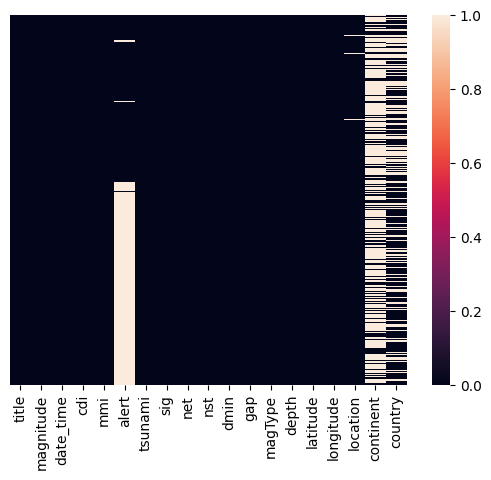

In [9]:
sns.heatmap(df_1.isnull(), yticklabels= False)

Most of the values in alert, continent and country features are absent, therefore these features can be removed:

In [10]:
df_1.drop(["alert", "continent", "country"], axis = 1, inplace= True )

<Axes: >

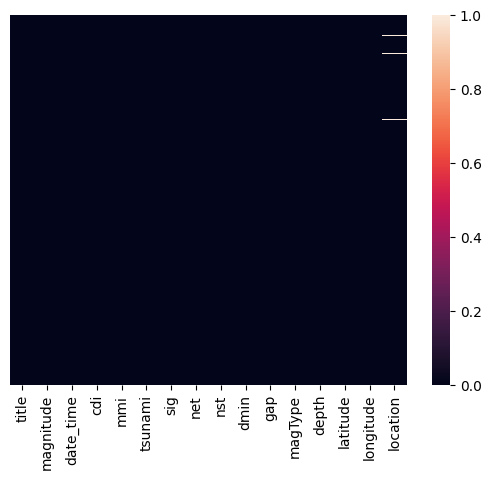

In [11]:
sns.heatmap(df_1.isnull(), yticklabels= False)

In [12]:
df_1["location"].nunique()

502

### Visualizing data relationships

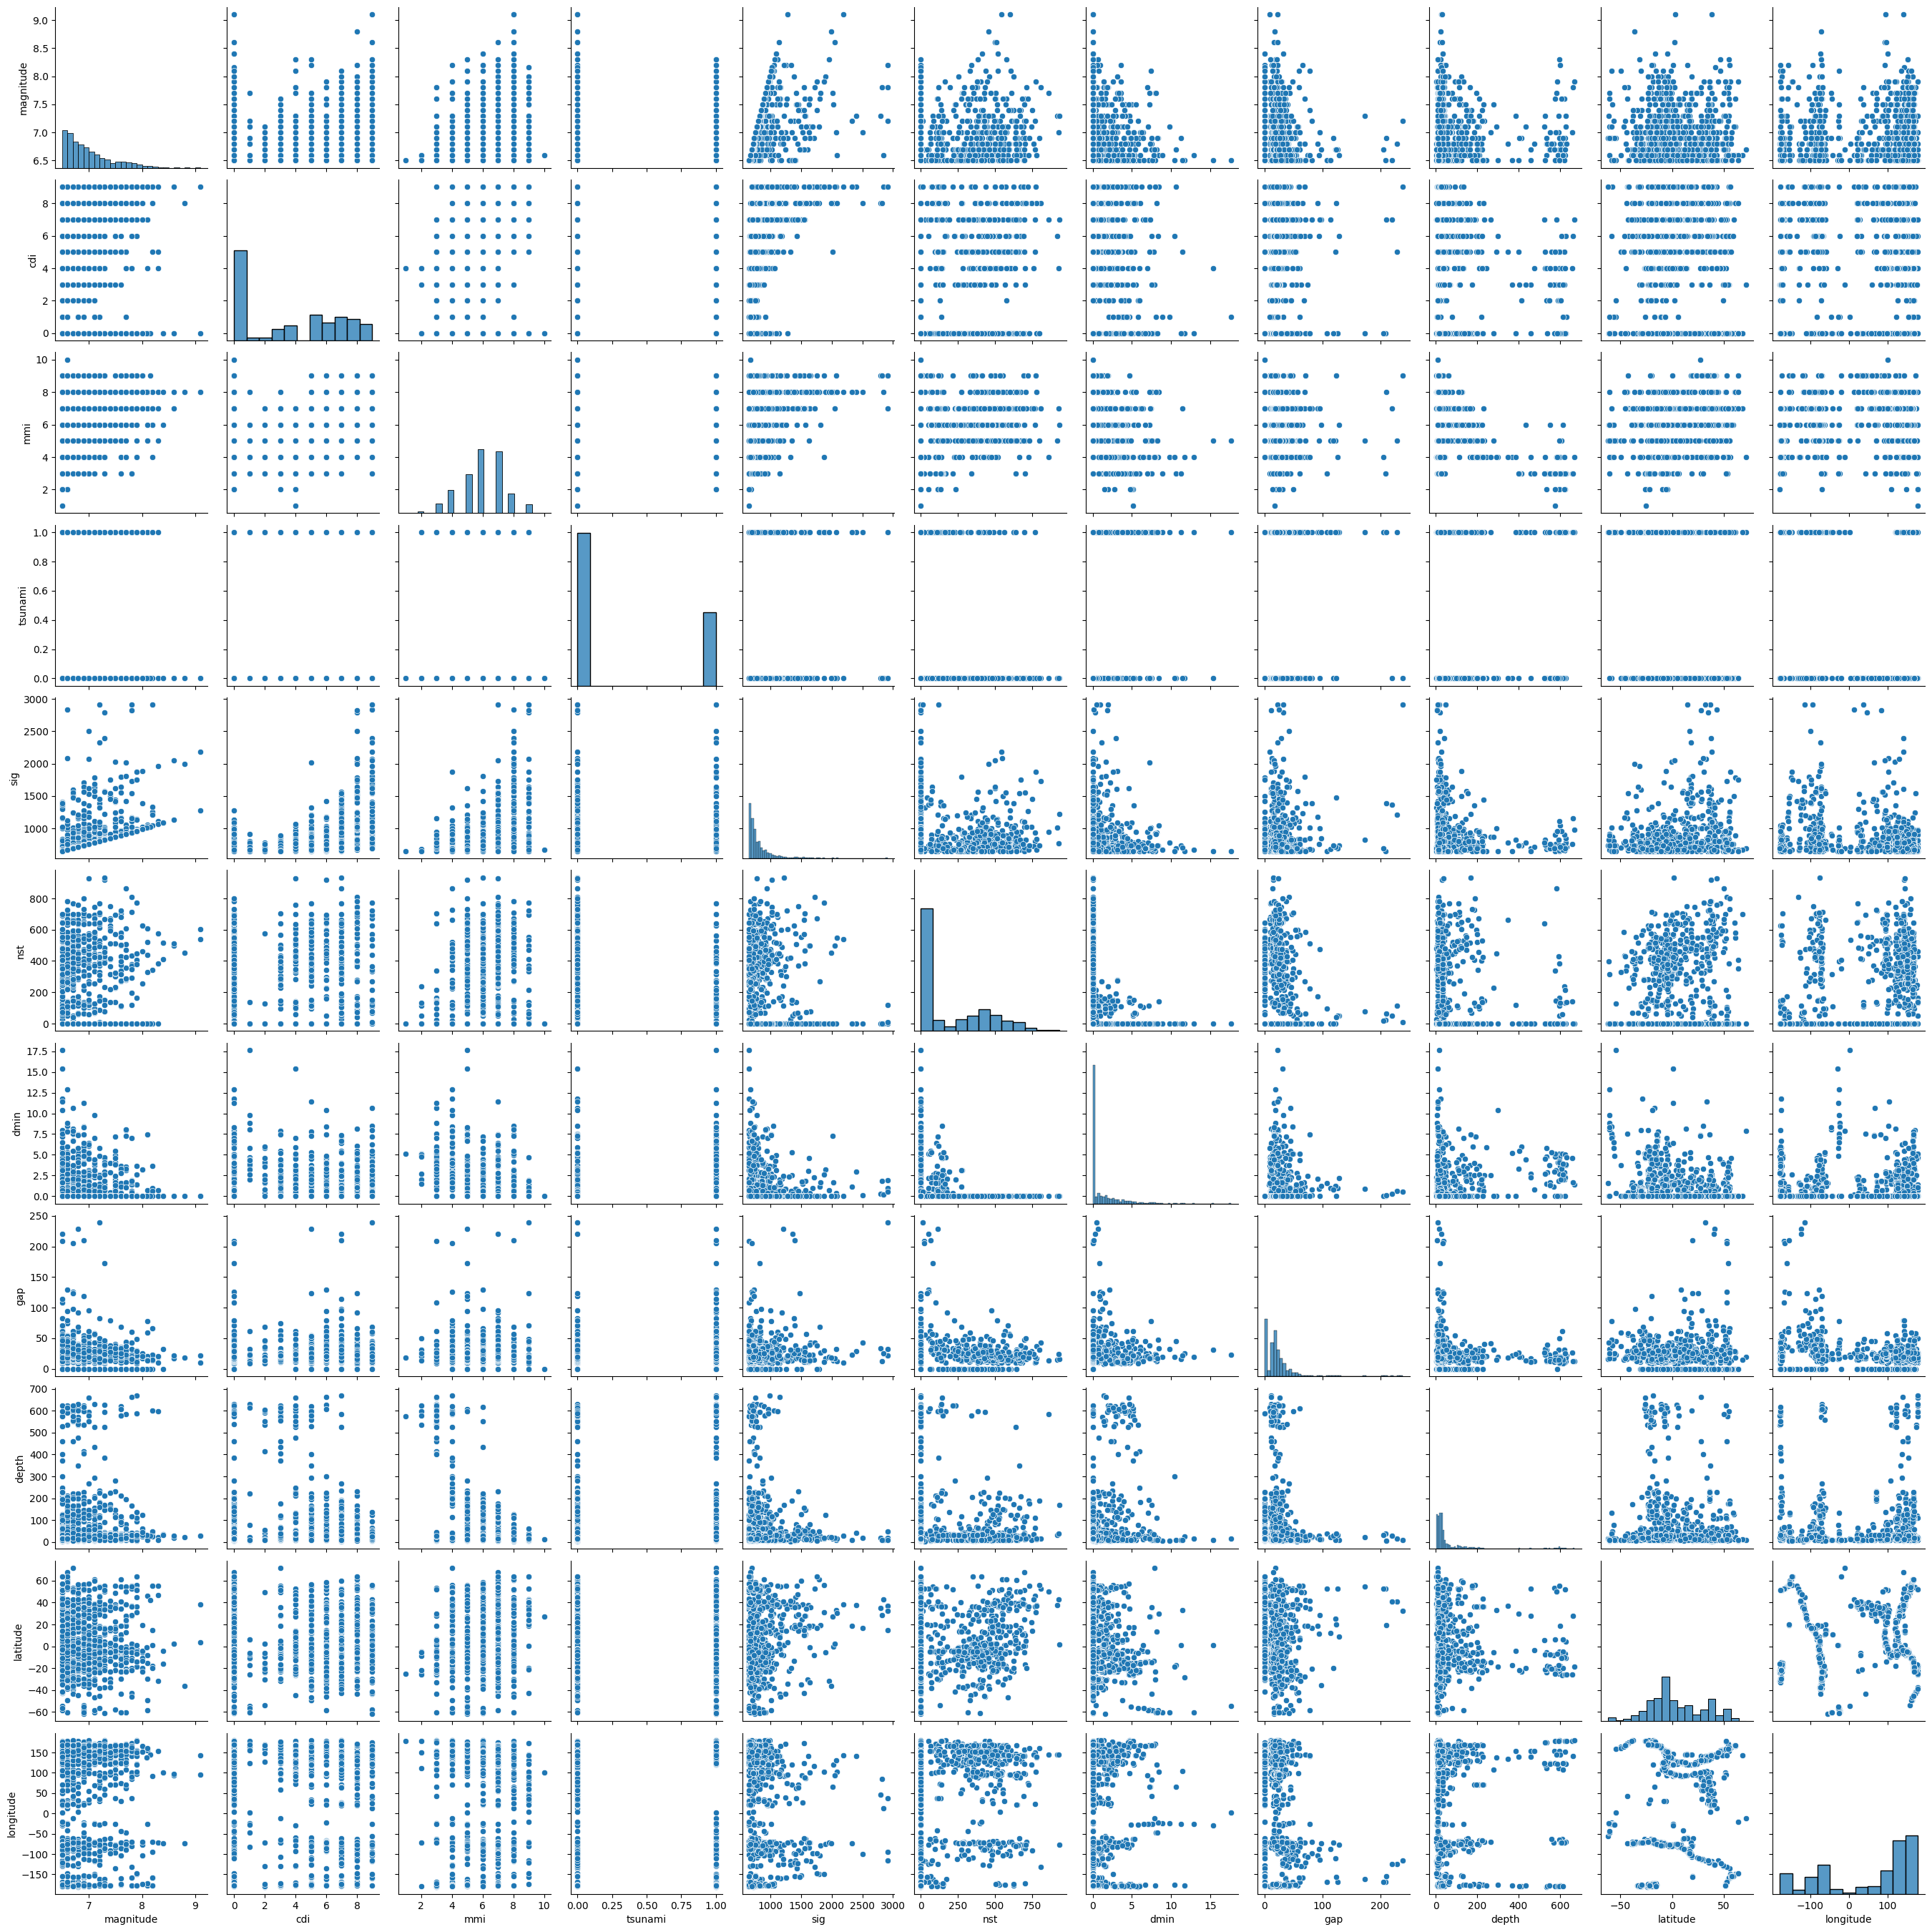

In [13]:
sns.pairplot(df_1)

In [14]:
df_1.head()

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu"
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador"
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina"
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska"
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula


/tmp/ipykernel_857/3666271870.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["magnitude"])


<Axes: xlabel='magnitude', ylabel='Density'>

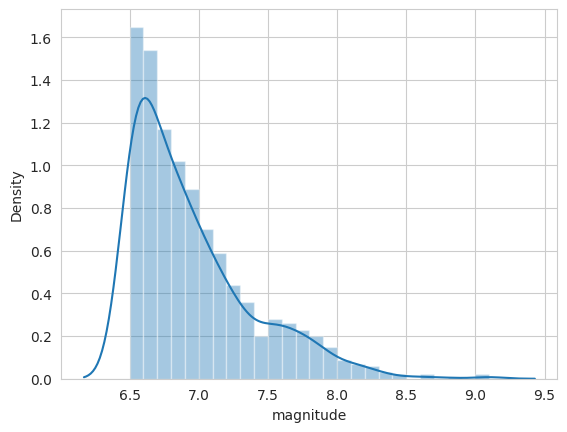

In [15]:
sns.set_style("whitegrid")
sns.distplot(df_1["magnitude"])

/tmp/ipykernel_857/2857702379.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_1["magType"], palette= "winter")


<Axes: ylabel='magType'>

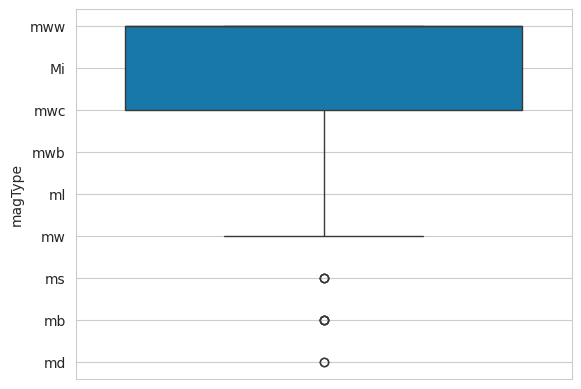

In [16]:
sns.boxplot(df_1["magType"], palette= "winter")

/tmp/ipykernel_857/248933951.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "magType", y = "magnitude", data= df_1, palette= "winter")


<Axes: xlabel='magType', ylabel='magnitude'>

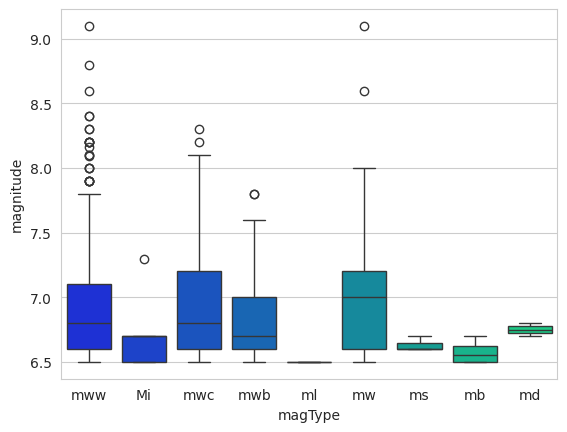

In [17]:
sns.boxplot(x = "magType", y = "magnitude", data= df_1, palette= "winter")

/tmp/ipykernel_857/1328838476.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_1["magnitude"], palette= "winter")


<Axes: ylabel='magnitude'>

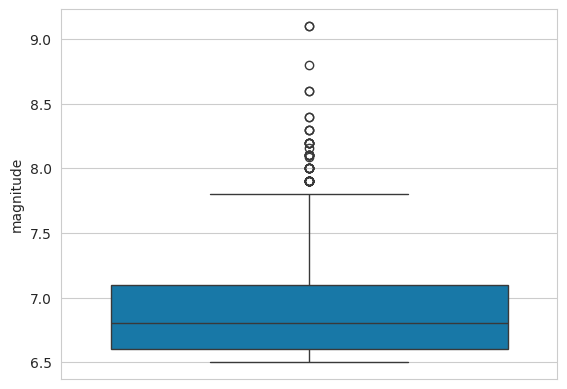

In [18]:
sns.boxplot(df_1["magnitude"], palette= "winter")

In [19]:
df_1.head(2)

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,0,657,us,114,7.177,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu"
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,0,775,us,92,0.679,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador"


/tmp/ipykernel_857/1452502023.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tsunami", y = "magnitude", data= df_1, palette= "winter")


<Axes: xlabel='tsunami', ylabel='magnitude'>

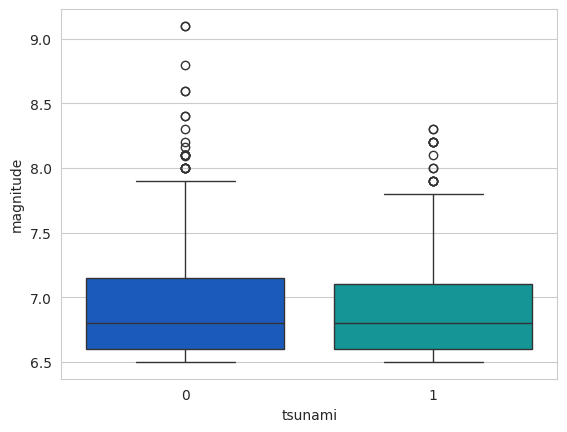

In [21]:
sns.boxplot(x="tsunami", y = "magnitude", data= df_1, palette= "winter")

In [26]:
# convert date_time to datetime using pandas so that it can be checked for correlation

df_1["date_time"] = pd.to_datetime(df_1["date_time"])

print(df_1["date_time"])

0     2023-08-16 12:47:00
1     2023-07-19 00:22:00
2     2023-07-17 03:05:00
3     2023-07-16 06:48:00
4     2023-07-16 06:48:00
              ...        
995   1995-05-27 13:03:00
996   1995-05-16 20:12:00
997   1995-05-14 11:33:00
998   1995-05-13 08:47:00
999   1995-05-05 03:53:00
Name: date_time, Length: 1000, dtype: datetime64[ns]


In [30]:
# Checking the correlation between the features

df_1.drop(["title", "location", "magType","net"], axis = 1).corr()

,magnitude,date_time,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
magnitude,1.000000,-0.036203,0.163170,0.282275,-0.001213,0.512358,0.091427,-0.081518,-0.087029,0.017083,-0.017505,-0.010710
date_time,-0.036203,1.000000,0.615568,-0.233420,0.643157,0.188761,-0.228732,0.537396,0.416792,0.187538,-0.116034,-0.132368
cdi,0.163170,0.615568,1.000000,0.197458,0.292202,0.479911,-0.003857,0.140505,0.277689,-0.051331,0.065383,-0.132190
mmi,0.282275,-0.233420,0.197458,1.000000,-0.175441,0.398149,0.110260,-0.307331,-0.068503,-0.517002,0.180799,-0.019398
tsunami,-0.001213,0.643157,0.292202,-0.175441,1.000000,0.024848,-0.426026,0.443179,0.236259,0.070705,-0.127002,-0.131340
sig,0.512358,0.188761,0.479911,0.398149,0.024848,1.000000,0.016636,-0.051440,0.158853,-0.079263,0.177575,-0.164200
nst,0.091427,-0.228732,-0.003857,0.110260,-0.426026,0.016636,1.000000,-0.402445,0.003023,-0.103897,0.109991,0.156543
dmin,-0.081518,0.537396,0.140505,-0.307331,0.443179,-0.051440,-0.402445,1.000000,0.091388,0.192698,-0.239791,-0.075595
gap,-0.087029,0.416792,0.277689,-0.068503,0.236259,0.158853,0.003023,0.091388,1.000000,-0.062215,0.052368,-0.267812
depth,0.017083,0.187538,-0.051331,-0.517002,0.070705,-0.079263,-0.103897,0.192698,-0.062215,1.000000,-0.101446,-0.030632


<Axes: >

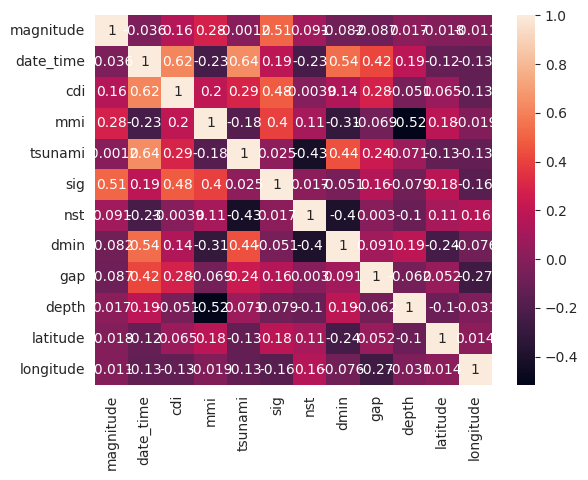

In [33]:
sns.heatmap(df_1.drop(["title", "location", "magType","net"], axis = 1).corr(), annot= True)

### Checking the categorical columns

In [37]:
print(df_1["net"].nunique())
print(df_1["net"].unique())

11
['us' 'at' 'pt' 'ak' 'nn' 'ci' 'hv' 'nc' 'official' 'duputel' 'uw']


In [38]:
print(df_1["magType"].nunique())
print(df_1["magType"].unique())

9
['mww' 'Mi' 'mwc' 'mwb' 'ml' 'mw' 'ms' 'mb' 'md']


In [45]:
df_1.head(2)

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,0,657,us,114,7.177,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu"
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,0,775,us,92,0.679,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador"


In [46]:
df_1.drop(["title", "location"], axis = 1, inplace= True)

In [47]:
df_1.head(2)

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,2023-08-16 12:47:00,7,4,0,657,us,114,7.177,25.0,mww,192.955,-13.8814,167.1580
1,6.5,2023-07-19 00:22:00,8,6,0,775,us,92,0.679,40.0,mww,69.727,12.8140,-88.1265


Splitting the dataset into train and test subset

In [48]:
from sklearn.model_selection import train_test_split

X = df_1.drop("magnitude", axis = 1)
y = df_1["magnitude"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 101)

Applying target encoding on categorical columns